### Task 3 : CAR PRICE PREDICTION WITH MACHINE LEARNING

Predicting the price of cars based on a wide range of attributes and features. Using a dataset containing car details such as safety ratings, dimensions, engine specifications, and more, we aim to develop a machine learning model that accurately estimates the price of different car models.

In [1]:
# Import Modules

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
# Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# Check missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [9]:
# Check duplicates
df.duplicated().sum()

2

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().any()

False

In [12]:
# statistical 
df.describe(include='number')

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.566332,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


The data includes 299 car entries.
On average, the cars are from 2013, get about 4.59 miles per gallon, and cost roughly 36,917.
There's some variation in the data, with a range from 2003 to 2018 for car years and prices ranging from 500 to 500,000.

Most cars are from around 2014, have mileages around 3.51 miles per gallon, and are priced near 32,000, with the majority having zero previous owners.

In [13]:
# checking the distibution of catagorical data
print(df['Selling_type'].value_counts())
print("-------------------------------")

print(df['Fuel_Type'].value_counts())
print("-------------------------------")

print(df['Transmission'].value_counts())
print("-------------------------------")

Dealer        193
Individual    106
Name: Selling_type, dtype: int64
-------------------------------
Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
-------------------------------
Manual       260
Automatic     39
Name: Transmission, dtype: int64
-------------------------------


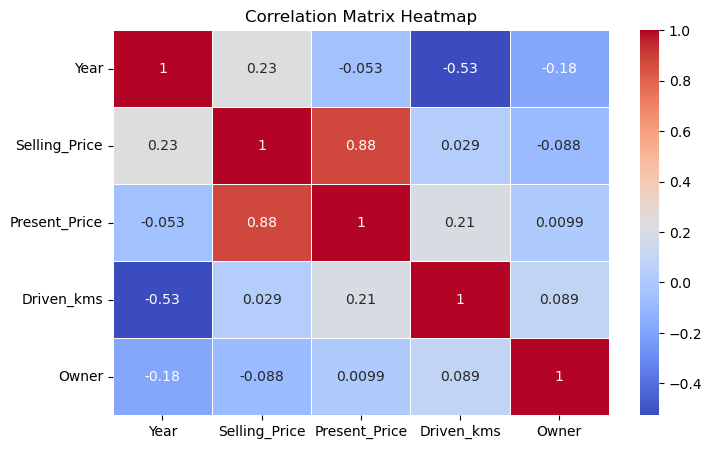

In [14]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 5))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

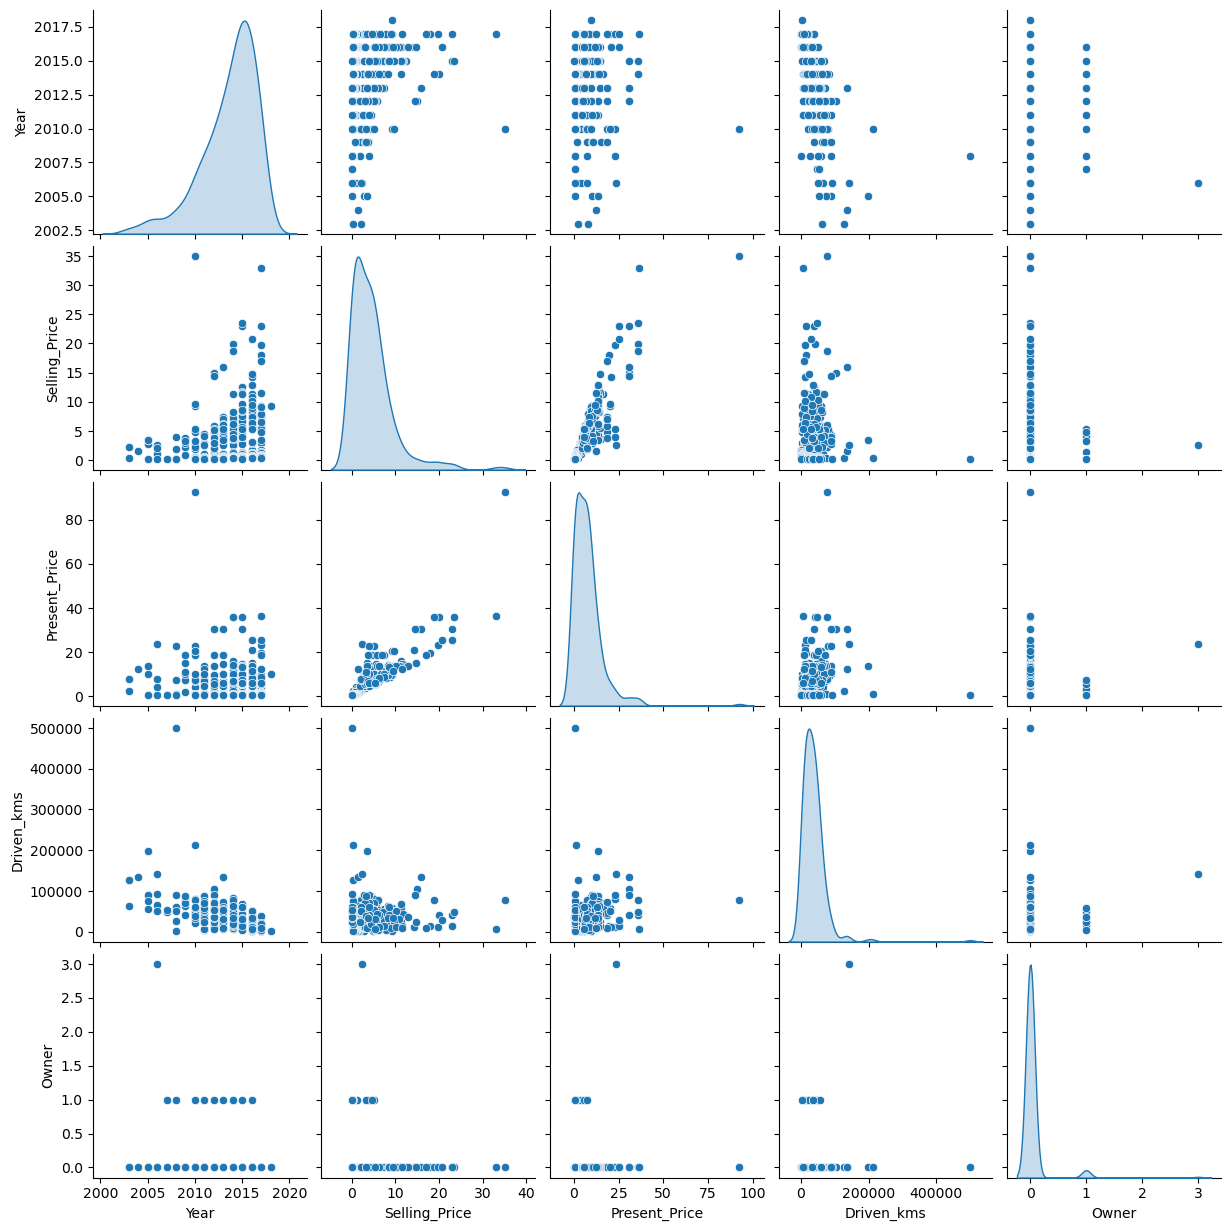

In [15]:
# Create a pair plot
sns.pairplot(df, diag_kind="kde")  # Use "hist" instead of "kde" to show histograms
plt.show()

* Typically, lower-priced cars often have higher mileage, indicating they've been used more frequently.

* When selling their cars, most people prefer vehicles with either no previous owners or very few previous owners.

* While the price of cars tends to decrease as mileage increases, a significant portion of buyers still prioritize affordability over lower mileage.

<AxesSubplot:xlabel='Driven_kms'>

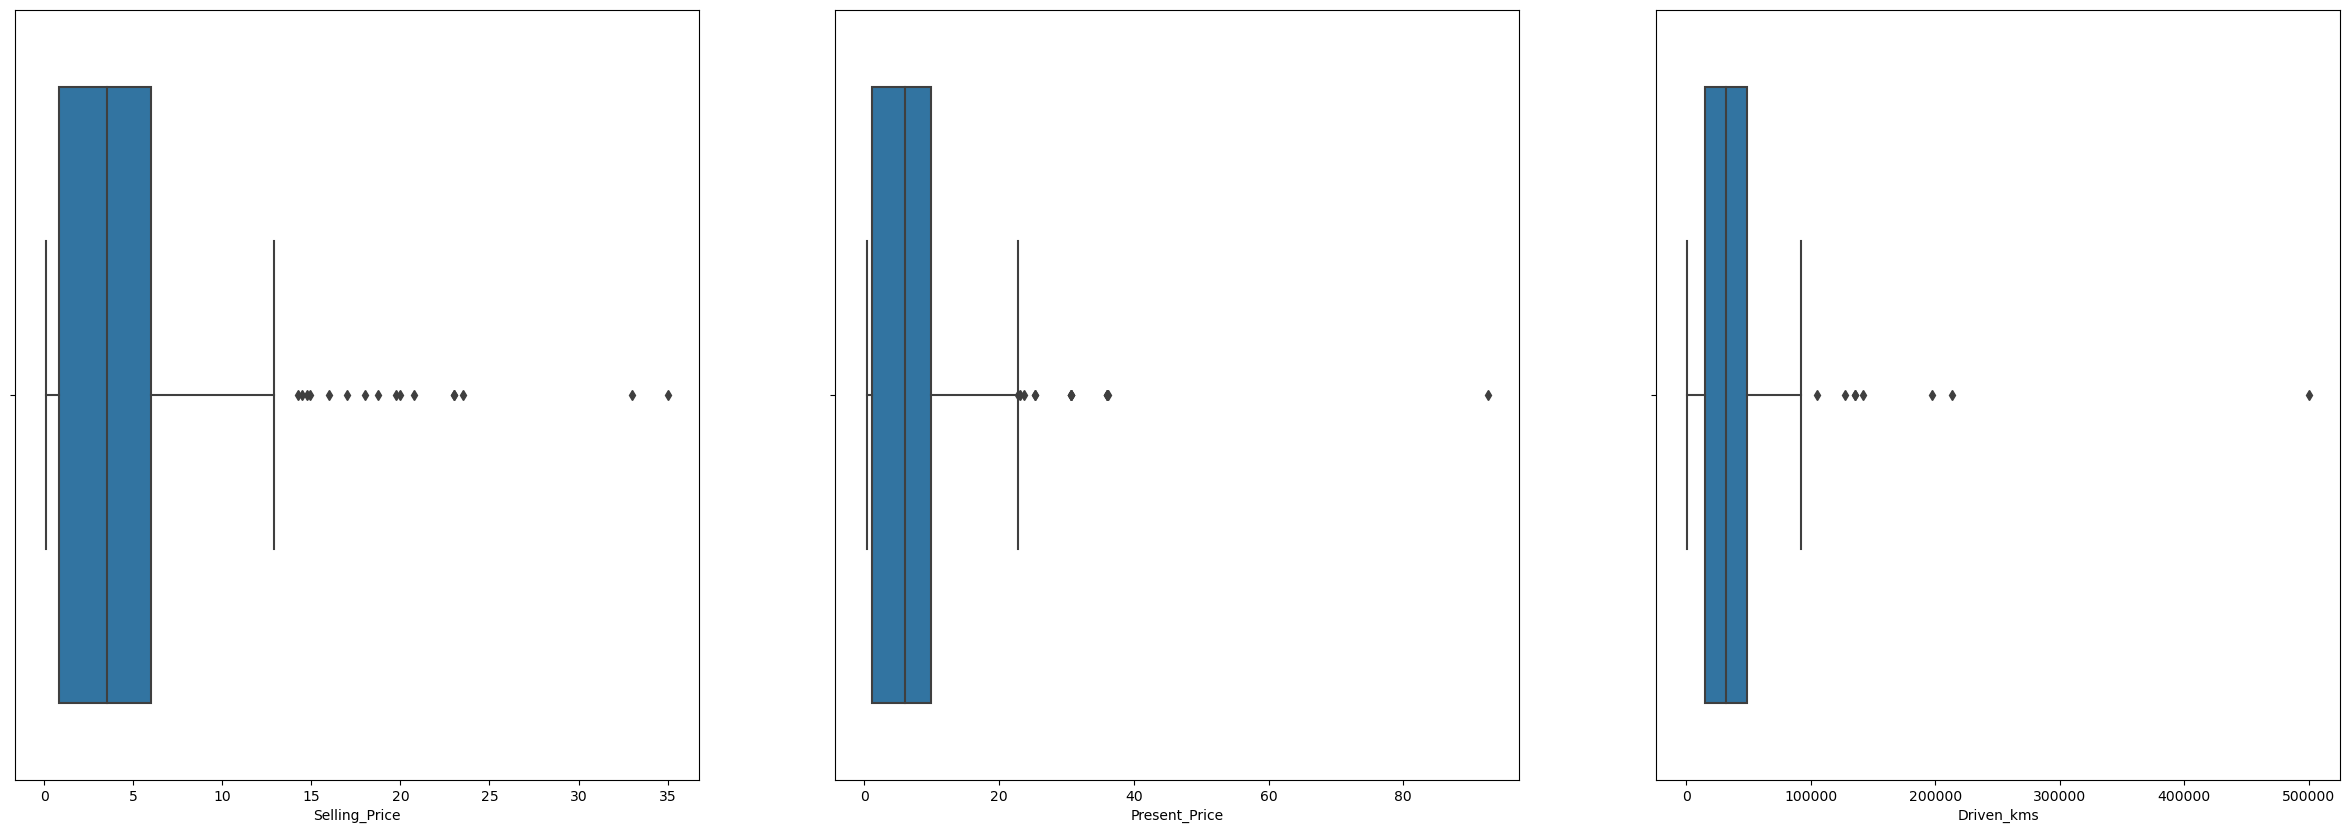

In [16]:
fig, ax = plt.subplots(1, 3,figsize=(30, 10) )
sns.boxplot(ax = ax[0], x = df['Selling_Price'])
sns.boxplot(ax = ax[1], x = df['Present_Price'])
sns.boxplot(ax = ax[2], x = df['Driven_kms'])

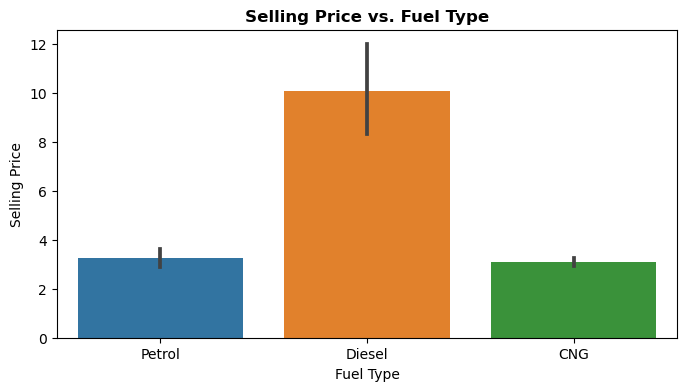

In [17]:
# selling price Vs Fuel Type
plt.figure(figsize=(8, 4))  
sns.barplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Selling Price vs. Fuel Type", fontsize=12, fontweight='bold')
plt.xticks(rotation=0) 
plt.xlabel("Fuel Type", fontsize=10)
plt.ylabel("Selling Price", fontsize=10)
plt.show()

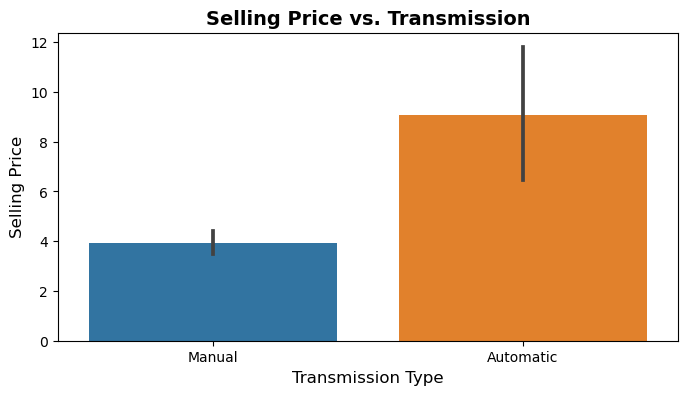

In [18]:
# Selling Price Value by Transmission
plt.figure(figsize=(8,4))  
sns.barplot(x='Transmission', y='Selling_Price', data=df)
plt.title("Selling Price vs. Transmission", fontsize=14, fontweight='bold')
plt.xticks(rotation=0)  
plt.xlabel("Transmission Type", fontsize=12)
plt.ylabel("Selling Price", fontsize=12)
plt.show()

* Cars equipped with automatic transmission tend to be the most expensive, along with those that feature a Diesel fuel type

In [19]:
def plot_bar(data, x, y, title):
    plt.figure(figsize=(12, 6))  
    sns.barplot(x=x, y=y, data=data)
    plt.title(title, fontsize=12, fontweight='bold')
    plt.xticks(rotation=0)  
    plt.xlabel(x, fontsize=10)
    plt.ylabel(y, fontsize=10)
    plt.show()

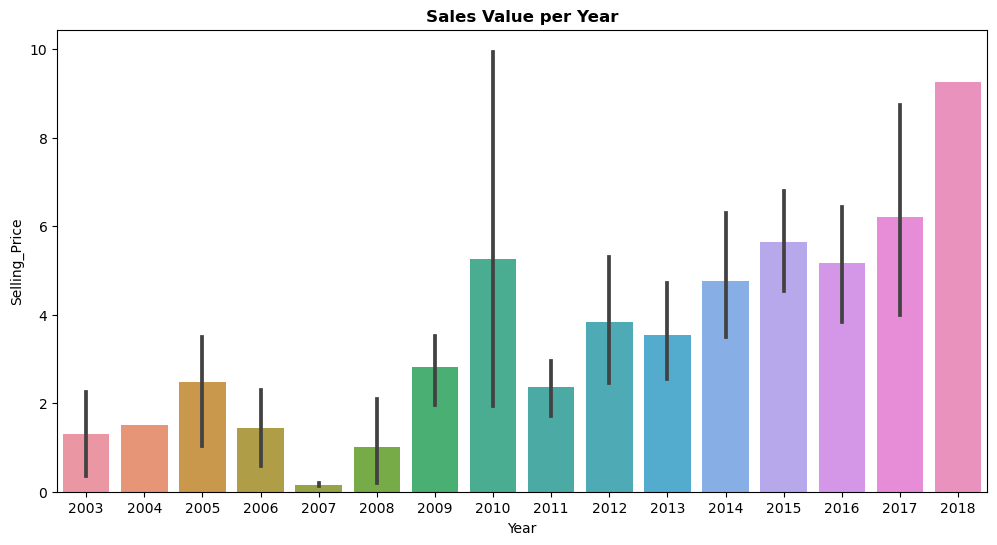

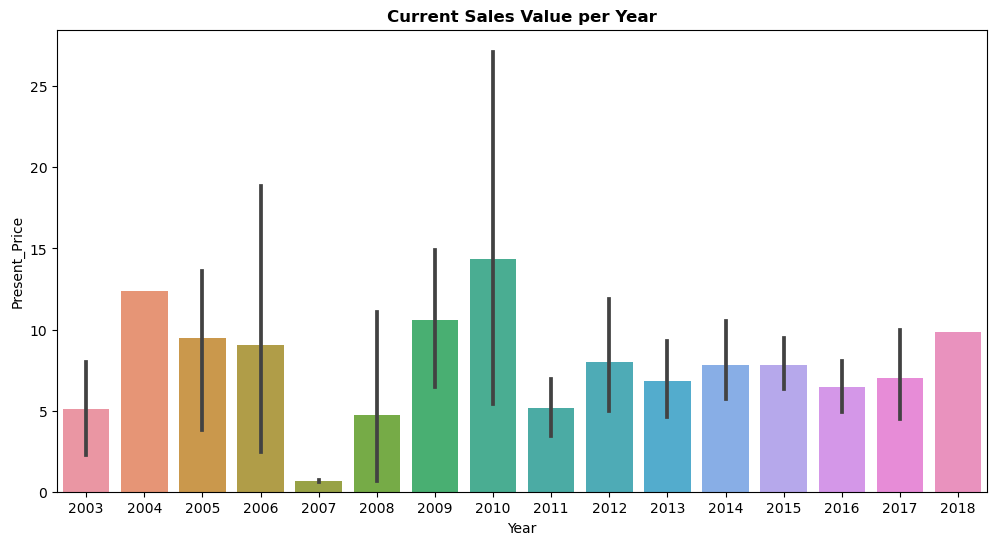

In [20]:
plot_bar(df, 'Year', 'Selling_Price', 'Sales Value per Year')
plot_bar(df, 'Year', 'Present_Price', 'Current Sales Value per Year')


The costliest cars are typically those with automatic transmission and Diesel fuel type.

Petrol-powered cars with manual transmission are sought after for their affordability.

Many individuals choose dealerships over direct sales when selling their cars.

Sales are most frequent in urban areas, particularly cities.

In [21]:
numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner'], dtype='object')
Categorical Columns: Index(['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'], dtype='object')


In [22]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [23]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [24]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [25]:
# Feature scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [26]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df['Selling_Price']

In [27]:
print(X)
print(Y)

         Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  \
0    0.132992      -0.228138   -0.254603          0             0   
1   -0.212787       0.233742    0.156181          1             0   
2    1.170329       0.269991   -0.770651          0             0   
3   -0.904345      -0.396520   -0.814297          0             0   
4    0.132992      -0.078466    0.142061          1             0   
..        ...            ...         ...        ...           ...   
296  0.824550       0.474622   -0.075193          1             0   
297  0.478771      -0.191889    0.592640          0             0   
298 -1.595904       0.404463    1.309818          0             0   
299  1.170329       0.579860   -0.716735          1             0   
300  0.824550      -0.191889   -0.807519          0             0   

     Transmission     Owner  
0               0 -0.175101  
1               0 -0.175101  
2               0 -0.175101  
3               0 -0.175101  
4               0 -0.

##### Evaluation Splitting the dataset into Training and Testing Datasets

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)

In [29]:
from sklearn.linear_model import LinearRegression


In [30]:
# Selecting the model

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Evaluating the model
#y_pred = model.predict(X_test)

In [31]:
data_prediction = model.predict(X_train)

In [32]:
from sklearn import metrics
error_score = metrics.r2_score(Y_train, data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8768029664697253


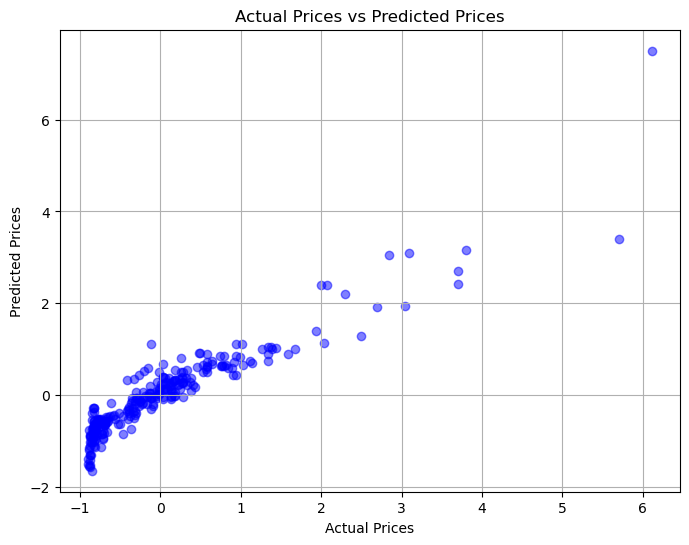

In [44]:
plt.figure(figsize=(8, 6))

plt.scatter(Y_train, data_prediction, color='blue', alpha=0.5)
plt.title("Actual Prices vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)
plt.show()

In [34]:
# Test Data

test_data_prediction = model.predict(X_test)

error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8561865067078208


In [36]:
from sklearn.metrics import r2_score
print('test data acc:',r2_score(Y_test, test_data_prediction))
print('train data acc:',r2_score(Y_train, data_prediction))

test data acc: 0.8561865067078208
train data acc: 0.8768029664697253


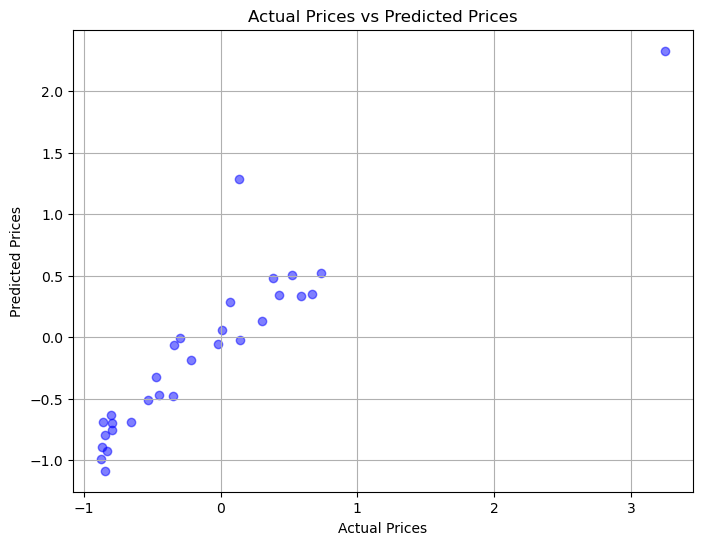

In [43]:
plt.figure(figsize=(8, 6)) 

plt.scatter(Y_test, test_data_prediction, color='blue', alpha=0.5)
plt.title("Actual Prices vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid(True)
plt.show()